# Regressão Linear

O objetivo deste notebook é fornecer uma intuição básica sobre o processo de regressão linear com gradiente descendente.

In [1]:
%matplotlib inline

#imports
from numpy import *
import matplotlib.pyplot as plt

#### Importa os dados
Será importado um conjunto de dados com 2 colunas, contendo a quantidade de horas de estudo e a pontuação de testes.

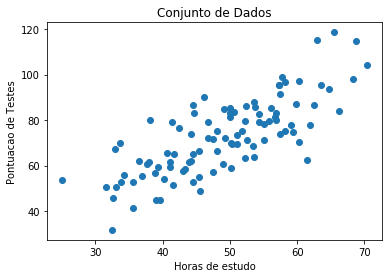

In [2]:
points = genfromtxt('data.csv', delimiter=',')

# Extrai as colunas
x = array(points[:,0])
y = array(points[:,1])

# Exibe o conjunto de dados
plt.scatter(x,y)
plt.xlabel('Horas de estudo')
plt.ylabel('Pontuacao de Testes')
plt.title('Conjunto de Dados')
plt.show()

#### Define função de atualização do gráfico

In [3]:
def update_chart(points, b, m, fig, ax1, ax2, iteration):
    # Extrai as colunas     
    x = array(points[:,0])
    y = array(points[:,1])

    # Preve o valor de y
    pred = m * x + b

    # Atualiza o gráfico com o conjunto de dados
    ax1.clear()
    ax1.scatter(x,y)
    ax1.plot(x, pred, c='r')
    ax1.axis([20, 80, 0, 140])
    ax1.set_title("Conjunto de Dados")
    ax1.set_xlabel('Horas de estudo')
    ax1.set_ylabel('Pontuacao de Testes')
    ax1.annotate("y = {0:.2f}x + {1:.2f}".format(m, b), xy=(25, 130))

    # Atualiza o gráfico com a busca do gradiente
    ax2.clear()
    ax2.scatter(b,m)
    ax2.plot([0,0], [m,b], c='g')
    ax2.axis([-1.0, 1.5, -0.5, 2.0])
    ax2.set_title("Busca do Gradiente")
    ax2.set_xlabel('linha y-intercep (B)')
    ax2.set_ylabel('linha slope (M)')
    ax2.annotate("iteracoes = {0}".format(iteration), xy=(-0.7, 1.8))
    ax2.annotate("m = {0:.2f}".format(m), xy=(-0.7, 1.7))
    ax2.annotate("b = {0:.2f}".format(b), xy=(-0.7, 1.6))

    fig.canvas.draw()    


#### Define os hiperparâmetros

In [25]:
# Hiperparâmetros
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 20

#### Define a função de custo

$$y=(mx + b)$$ 

$$Error_{(m,b)}=\frac{1}{N}\sum_{i=1}^N (y_i - (mx_i + b))^2$$


In [26]:
def compute_cost(b, m, points):
    total_cost = 0
    N = float(len(points))
    
    # Calcula a soma dos erros quadráticos
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    # Retorna a média dos erros quadráticos
    return total_cost/N

#### Define a função de Gradiente Descendente

In [27]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []
          
    %matplotlib notebook

    plt.rcParams["figure.figsize"] = [12, 5]
    plt.ion()

    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    # Para cada iteração, otimiza b, m e calcula o seu custo
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        b, m = step_gradient(b, m, array(points), learning_rate)
        
        update_chart(points, b, m, fig, ax1, ax2, i+1)

    return [b, m, cost_graph]

$$\frac{\partial}{\partial m}=\frac{2}{N}\sum_{i=1}^N - x_i(y_i - (mx_i + b))$$

$$\frac{\partial}{\partial b}=\frac{2}{N}\sum_{i=1}^N - (y_i - (mx_i + b))$$


In [28]:
def step_gradient(b_current, m_current, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    # Calcula o Gradiente
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))

    # Atualiza m e b atual
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient
  
    # Retorna os parâmetro atualizados
    return b_updated, m_updated

#### Executa a função gradient_descent_runner() para obter os parâmetros b e m otimizados

<IPython.core.display.Javascript object>


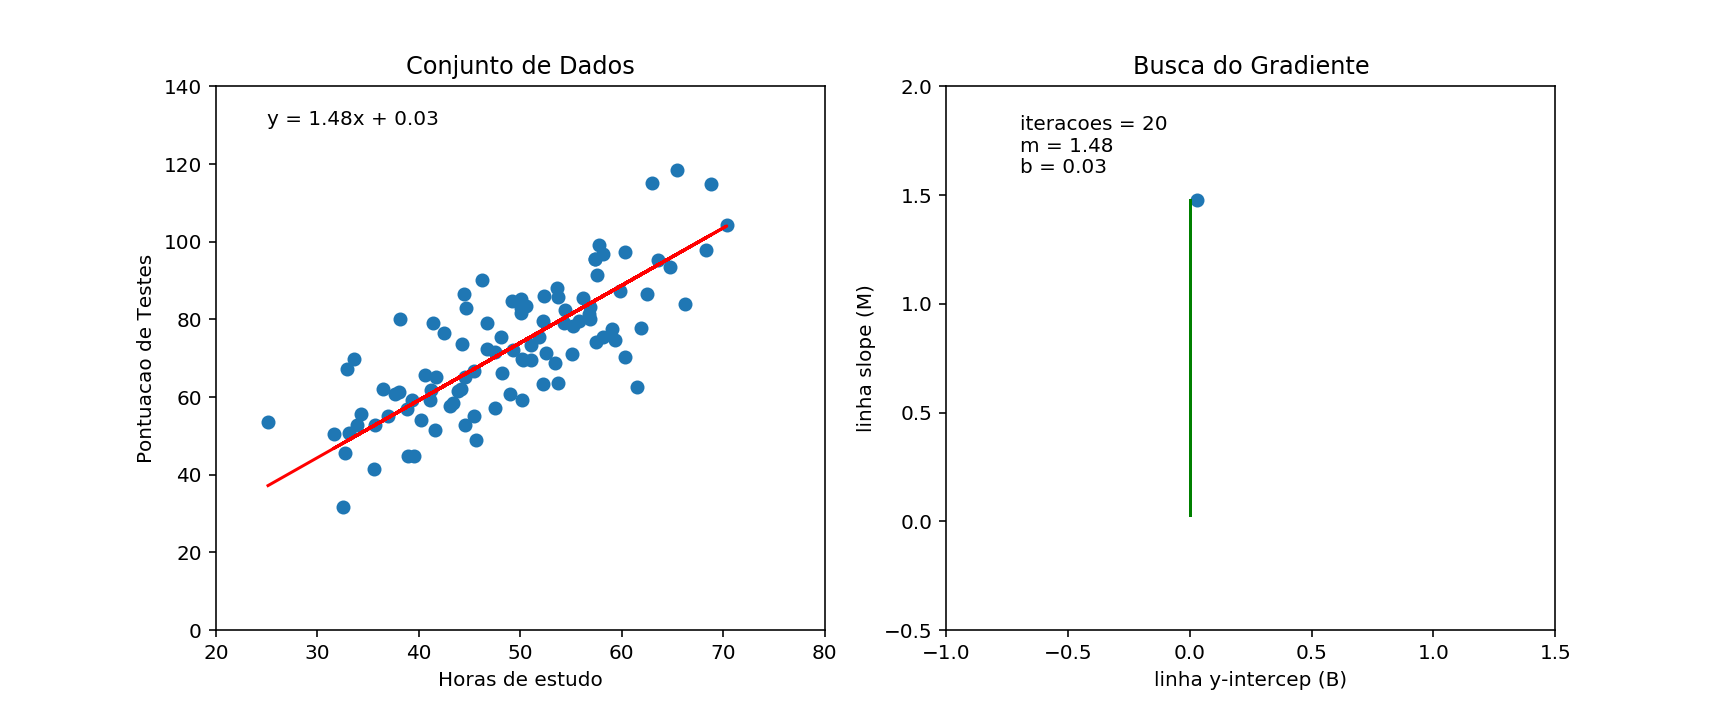

b otimizado: 0.030269517287775917
m otimizado 1.478895662279729
Custo minimizado: 112.64994426496074


In [29]:
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

# Imprime os parâmetros otimizados
print('b otimizado:', b)
print('m otimizado', m)

# Imprime o erro com os parâmetros otimizados
print('Custo minimizado:', compute_cost(b, m, points))

#### Exibe o custo por iteração

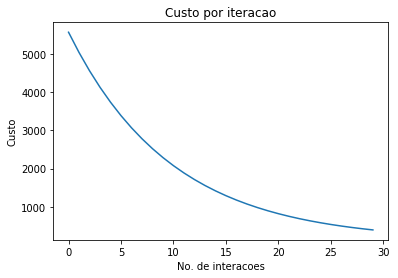

In [51]:
%matplotlib inline

plt.plot(cost_graph)
plt.xlabel('No. de interacoes')
plt.ylabel('Custo')
plt.title('Custo por iteracao')
plt.show()

Gradiente descendente converge para o minimo local após 100 iterações